In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from deonticAgent import deonticAgent
from virtuousAgent import virtuousAgent
from networkFunctions import *
from plotFunctions import *

In [2]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 20
numMsg = 200
myseed = 32
maxEpochs = 10000

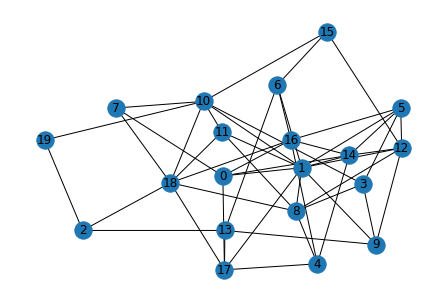

In [3]:
G = nx.erdos_renyi_graph(numNodes, 0.2, seed=myseed)
myPos = nx.spring_layout(G, seed = 40)
nx.draw(G, pos=myPos, with_labels=True)

In [4]:
#graph initialization
def initGraph(G, commonAttrs):

    nodeAttr = {}
    for i in range(numNodes):
        temp = {}
        temp['agent'] = virtuousAgent(commonAttrs)
        nodeAttr[i] = temp
    nx.set_node_attributes(G, nodeAttr)

    for n in G.nodes():
        neigList = list(G.neighbors(n))
        agent = G.nodes[n]['agent']
        agent.initNeig(neigList)

In [13]:
prevStates = []
maxEpochs = 1
commonAttrs = {"burnoutThreshold":2*(numMsg*costFactor*msgUtility)/numNodes,"burnoutDrop":2}

attr = "burnoutThreshold"
attrRange = np.arange(5*costFactor*msgUtility, 40*costFactor*msgUtility, 5)
outcomeNetwork = {}

for val in attrRange:
    commonAttrs[attr] = val
    initGraph(G, commonAttrs)
    e = 0
    while e<maxEpochs:
        e+=1
        msgList = createMsgs(numMsg, numNodes, G)  #Message list creation
        prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(numNodes)]
        nf, nd = transmitMsgs(msgList, G)
        curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(numNodes)]
        if np.count_nonzero(curStable) == numNodes:
            break
    outcomeNetwork[val] = copy.deepcopy(G)

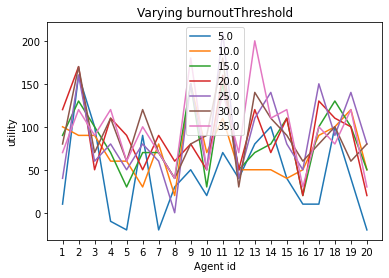

In [14]:
plotAgentWiseVaryParams(outcomeNetwork, "utility", attr)

[0, 1, 2, 3, 4, 5, 6]


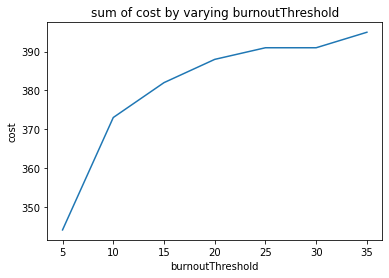

In [15]:
plotNetworkVaryParams(outcomeNetwork, 'cost', attr)

In [16]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

0
35.0


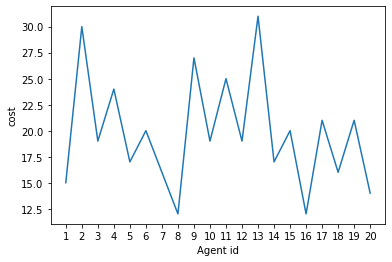

In [17]:
plotAgentwiseProp(G, "cost")

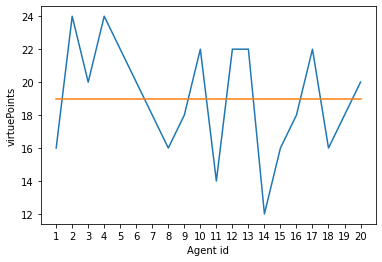

In [18]:
plotAgentwiseProp(G, "virtuePoints", plotMean=True)

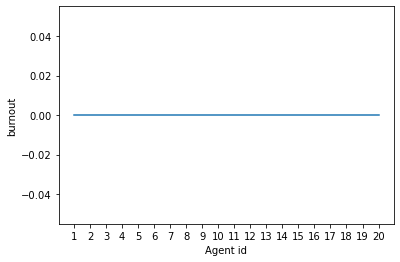

In [19]:
plotAgentwiseProp(G, "burnout")

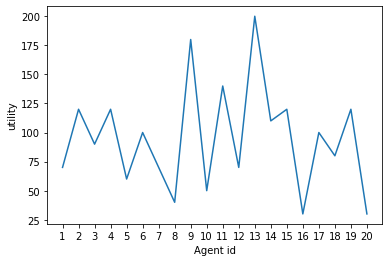

In [20]:
plotAgentwiseProp(G, "utility")